In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models

In [2]:
import os
import random
import cv2
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("full_df.csv")
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [4]:
img_dir = r'C:\Users\KIIT\Documents\Deep Learning\preprocessed_images'

In [5]:
df = df.iloc[:,1:7]
df.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy
3,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy
4,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy


In [8]:
df_left_nor = df[df['Left-Diagnostic Keywords'] == 'normal fundus']
df_left_nor.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
7,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus
8,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration
12,55,Male,14_left.jpg,14_right.jpg,normal fundus,macular epiretinal membrane
13,50,Male,15_left.jpg,15_right.jpg,normal fundus,myelinated nerve fibers


In [9]:
df_rt_nor = df[df['Right-Diagnostic Keywords'] == 'normal fundus']
df_rt_nor.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
7,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus
9,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus
24,59,Male,29_left.jpg,29_right.jpg,epiretinal membrane,normal fundus


In [10]:
df_nor_filenames = df_left_nor['Left-Fundus'].append(df_rt_nor['Right-Fundus'],ignore_index=True)
df_nor_filenames

0           1_left.jpg
1           8_left.jpg
2           9_left.jpg
3          14_left.jpg
4          15_left.jpg
             ...      
5496    4642_right.jpg
5497    4644_right.jpg
5498    4660_right.jpg
5499    4671_right.jpg
5500    4689_right.jpg
Length: 5501, dtype: object

In [11]:
len(df_nor_filenames)

5501

In [12]:
df_nor_filenames = df_nor_filenames.sample(5501)
df_nor_filenames = df_nor_filenames.reset_index(drop=True)
df_nor_filenames.head()

0       85_left.jpg
1    2385_right.jpg
2     2905_left.jpg
3    3390_right.jpg
4     2515_left.jpg
dtype: object

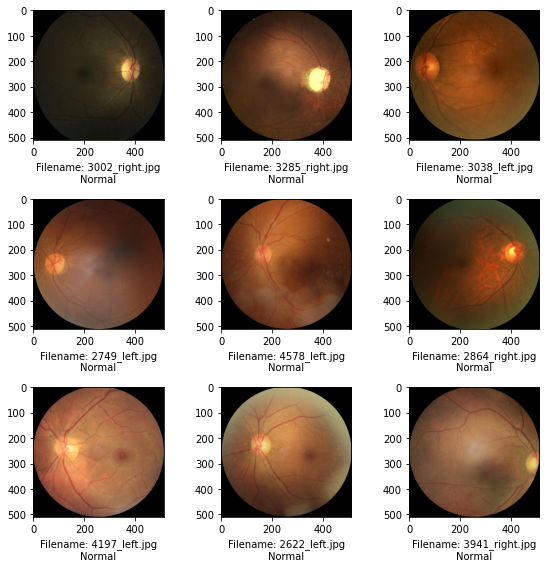

In [14]:
# Grid images of normal eye

plt.figure(figsize=(8,8))
for i in range(9):
    img = df_nor_filenames[i+9]
    image = cv2.imread(os.path.join(img_dir, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(image_rgb)
    plt.xlabel('Filename: {}\n''Normal'.format(df_nor_filenames[i+9]))
    
plt.tight_layout()

In [15]:
df_left_oth = df[df['Left-Diagnostic Keywords'] != 'normal fundus']
df_left_oth.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus
2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy
3,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy
4,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy
5,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...


In [16]:
df_rt_oth = df[df['Right-Diagnostic Keywords'] != 'normal fundus']
df_rt_oth.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy
3,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy
4,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy
5,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...
6,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy


In [17]:
df_oth_filenames = df_left_oth['Left-Fundus'].append(df_rt_oth['Right-Fundus'],ignore_index=True)
df_oth_filenames

0           0_left.jpg
1           2_left.jpg
2           4_left.jpg
3           5_left.jpg
4           6_left.jpg
             ...      
7278    4683_right.jpg
7279    4686_right.jpg
7280    4688_right.jpg
7281    4690_right.jpg
7282    4784_right.jpg
Length: 7283, dtype: object

(512, 512, 3)
48_left.jpg


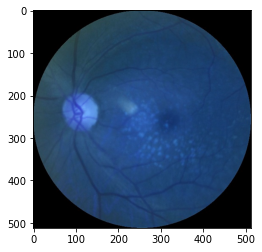

In [19]:
img = df_oth_filenames[29]
image = cv2.imread(os.path.join(img_dir, img))
plt.imshow(image)
print(image.shape)
print(img)

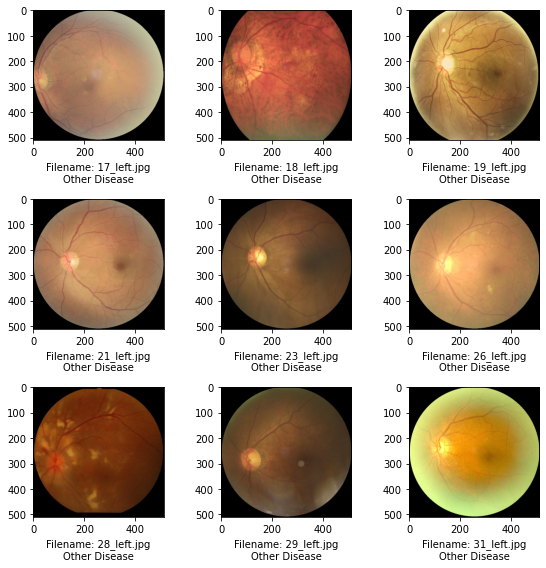

In [20]:
plt.figure(figsize=(8,8))
for i in range(9):
    img = df_oth_filenames[i+9]
    image = cv2.imread(os.path.join(img_dir, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(image_rgb)
    plt.xlabel('Filename: {}\n''Other Disease'.format(df_oth_filenames[i+9]))
    
plt.tight_layout()

In [21]:
len(df_nor_filenames)

5501

In [22]:
len(df_oth_filenames)

7283

In [23]:
df_oth_filenames = df_oth_filenames.sample(5501)
len(df_oth_filenames)

5501

In [24]:
df_oth_filenames = pd.DataFrame(df_oth_filenames, columns = ["filename"])
df_oth_filenames["label"] = "Other"
df_oth_filenames.head()

,filename,label
6903,4190_right.jpg,Other
6972,4270_right.jpg,Other
1696,4498_left.jpg,Other
3833,352_right.jpg,Other
4367,1230_right.jpg,Other


In [27]:
df_oth_filenames = df_oth_filenames.reset_index(drop=True)

In [28]:
df_oth_filenames.head()

,filename,label
0,4190_right.jpg,Other
1,4270_right.jpg,Other
2,4498_left.jpg,Other
3,352_right.jpg,Other
4,1230_right.jpg,Other


In [29]:
df_nor_filenames = pd.DataFrame(df_nor_filenames, columns = ["filename"])
df_nor_filenames["label"] = "normal"
df_nor_filenames.head()

,filename,label
0,85_left.jpg,normal
1,2385_right.jpg,normal
2,2905_left.jpg,normal
3,3390_right.jpg,normal
4,2515_left.jpg,normal


In [30]:
df_combined = df_oth_filenames.append(df_nor_filenames,ignore_index = True)
df_combined

,filename,label
0,4190_right.jpg,Other
1,4270_right.jpg,Other
2,4498_left.jpg,Other
3,352_right.jpg,Other
4,1230_right.jpg,Other
...,...,...
10997,2619_right.jpg,normal
10998,3388_left.jpg,normal
10999,2806_right.jpg,normal
11000,4408_right.jpg,normal


In [31]:
df_combined = df_combined.sample(11002)
df_combined = df_combined.reset_index(drop=True)
df_combined

,filename,label
0,3104_left.jpg,normal
1,3235_right.jpg,normal
2,2098_right.jpg,Other
3,110_right.jpg,normal
4,2499_left.jpg,normal
...,...,...
10997,3997_right.jpg,Other
10998,2908_right.jpg,normal
10999,3200_right.jpg,normal
11000,4344_left.jpg,Other


In [32]:
a  = np.array(df_combined.filename)

In [33]:
a.shape

(11002,)

In [34]:
paths = []

In [35]:
for i in range(11002):
    img = a[i]
    image = os.path.join(img_dir, img)
    paths.append(image)

In [36]:
paths

['C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\3104_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\3235_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2098_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\110_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2499_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\773_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\266_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2431_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\127_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\168_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\4166_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2195_right.jpg',
 'C:\\Users\\

In [385]:
data = []

In [386]:
for i in range(3324):
    img = paths[i]
    image = cv2.imread(img)
    image = cv2.resize(image,[224,224])
    data.append(image)

In [394]:
rough = df_combined[:3324]
rough

,filename,label
0,3104_left.jpg,normal
1,3235_right.jpg,normal
2,2098_right.jpg,Other
3,110_right.jpg,normal
4,2499_left.jpg,normal
...,...,...
3319,582_right.jpg,Other
3320,3952_left.jpg,Other
3321,1977_left.jpg,Other
3322,2134_right.jpg,Other


In [403]:
x = data
y = []
for i in rough.label:
    if(i=='normal'):
        y.append(1)
    else:
        y.append(0)
y = np.array(y)

In [402]:
data = np.array(data)
data = data/255

In [396]:
y[:5]

array([1, 1, 0, 1, 1])

In [404]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.125)
x_val,x_test,y_val,y_test = train_test_split(x_val,y_val,test_size=0.5)

print(len(x_train))
print(len(x_val))
print(len(x_test))

2908
208
208


### MobileNet V2 Model

In [406]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [407]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [408]:
num_of_classes = 2

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [428]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
91/91 [==============================] - 94s 1s/step - loss: 0.4963 - accuracy: 0.7531
Epoch 2/10
91/91 [==============================] - 91s 1s/step - loss: 0.4896 - accuracy: 0.7552
Epoch 3/10
91/91 [==============================] - 91s 1s/step - loss: 0.4922 - accuracy: 0.7510
Epoch 4/10
91/91 [==============================] - 91s 1s/step - loss: 0.4778 - accuracy: 0.7648
Epoch 5/10
91/91 [==============================] - 92s 1s/step - loss: 0.4851 - accuracy: 0.7596
Epoch 6/10
91/91 [==============================] - 92s 1s/step - loss: 0.4667 - accuracy: 0.7734
Epoch 7/10
91/91 [==============================] - 92s 1s/step - loss: 0.4684 - accuracy: 0.7724
Epoch 8/10
91/91 [==============================] - 92s 1s/step - loss: 0.4587 - accuracy: 0.7741
Epoch 9/10
91/91 [==============================] - 92s 1s/step - loss: 0.4664 - accuracy: 0.7610
Epoch 10/10
91/91 [==============================] - 92s 1s/step - loss: 0.4572 - accuracy: 0.7782


In [429]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 8s 927ms/step - loss: 0.5667 - accuracy: 0.7115


[0.5666559934616089, 0.7115384340286255]

In [430]:
model.evaluate(x_val,y_val)

7/7 [==============================] - 7s 917ms/step - loss: 0.5486 - accuracy: 0.6538


[0.5486319065093994, 0.6538461446762085]

In [434]:
y_pre = model.predict(x_val)
y_pred = [np.argmax(i) for i in y_pre]
y_pred[:10]

[1, 0, 0, 1, 0, 0, 1, 1, 0, 1]

In [437]:
from sklearn.metrics import classification_report

In [438]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67       109
           1       0.64      0.63      0.63        99

    accuracy                           0.65       208
   macro avg       0.65      0.65      0.65       208
weighted avg       0.65      0.65      0.65       208



# VGG-16 Model

In [411]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras import layers,models
from keras.layers import Flatten,Dense
from keras.models import Model

In [412]:
IMAGE_SIZE = [224,224]

In [415]:
vgg = VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [416]:
for layers in vgg.layers:
    layers.trainable = False

In [417]:
x = Flatten()(vgg.output)

In [418]:
prediction = Dense(2,activation = 'softmax')(x)

In [421]:
model1 = Model(inputs = vgg.input, outputs = prediction) 

In [422]:
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [423]:
model2.compile(optimizer = 'nadam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [ ]:
model2.fit(x_train,y_train,epochs=10)
# Not implementing this model as the computational time is too high for this model

### ResNet-50 Model

In [425]:
num_classes = 2
model2 = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/resnet_50/classification/1",
                   trainable=False,input_shape=(224, 224, 3)),  
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [426]:
model2 = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [431]:
model2.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=10)

Epoch 1/10
91/91 [==============================] - 94s 1s/step - loss: 0.5064 - accuracy: 0.7407
Epoch 2/10
91/91 [==============================] - 91s 999ms/step - loss: 0.4919 - accuracy: 0.7562
Epoch 3/10
91/91 [==============================] - 91s 1s/step - loss: 0.4907 - accuracy: 0.7534
Epoch 4/10
91/91 [==============================] - 91s 999ms/step - loss: 0.4823 - accuracy: 0.7593
Epoch 5/10
91/91 [==============================] - 93s 1s/step - loss: 0.4784 - accuracy: 0.7627
Epoch 6/10
91/91 [==============================] - 92s 1s/step - loss: 0.4878 - accuracy: 0.7579
Epoch 7/10
91/91 [==============================] - 92s 1s/step - loss: 0.4651 - accuracy: 0.7748
Epoch 8/10
91/91 [==============================] - 92s 1s/step - loss: 0.4641 - accuracy: 0.7737
Epoch 9/10
91/91 [==============================] - 92s 1s/step - loss: 0.4587 - accuracy: 0.7785
Epoch 10/10
91/91 [==============================] - 92s 1s/step - loss: 0.4612 - accuracy: 0.7703


In [432]:
model2.evaluate(x_val,y_val)

7/7 [==============================] - 8s 926ms/step - loss: 0.5392 - accuracy: 0.6731


[0.5391578078269958, 0.6730769276618958]

In [433]:
model2.evaluate(x_test,y_test)

7/7 [==============================] - 7s 926ms/step - loss: 0.5748 - accuracy: 0.6971


[0.5747743844985962, 0.6971153616905212]